# regrid Argo MLD data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import xesmf as xe

In [2]:
ds=xr.open_dataset('Argo_mixedlayers_monthlyclim_04142022.nc')

In [3]:
# this is a 1 x 1 data. 
ds

<xarray.Dataset>
Dimensions:        (iLAT: 180, iLON: 360, iMONTH: 12)
Dimensions without coordinates: iLAT, iLON, iMONTH
Data variables: (12/20)
    lat            (iLAT) float64 ...
    lon            (iLON) float64 ...
    month          (iMONTH) float64 ...
    mld_da_mean    (iLAT, iLON, iMONTH) float64 ...
    mld_dt_mean    (iLAT, iLON, iMONTH) float64 ...
    mld_da_median  (iLAT, iLON, iMONTH) float64 ...
    ...             ...
    mlt_dt         (iLAT, iLON, iMONTH) float64 ...
    mls_da         (iLAT, iLON, iMONTH) float64 ...
    mls_dt         (iLAT, iLON, iMONTH) float64 ...
    num            (iLAT, iLON, iMONTH) float64 ...
    longrid        (iLAT, iLON) float64 ...
    latgrid        (iLAT, iLON) float64 ...
Attributes:
    description:  This file was created using \n matlab R2011b with NETCDF Li...
    date:         [730848.53015047 730848.88790506 730849.28543982 ... 738591...

In [4]:
# to reduce data, regrid to 3 x 3 grid

In [5]:
# create an empty dataset with new coordinates
ds_out = xr.Dataset(
    {
        "lat": (["lat"], np.arange(-88.5, 90, 3.0)),
        "lon": (["lon"], np.arange(-178.5, 180, 3.0)),
    }
)

In [7]:
# create a regridder
regridder = xe.Regridder(ds, ds_out, "bilinear", periodic=True)
regridder

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_180x360_60x120_peri.nc 
Reuse pre-computed weights? False 
Input grid shape:           (180, 360) 
Output grid shape:          (60, 120) 
Periodic in longitude?      True

In [8]:
# now, apply the regridder
ds_out=regridder(ds)

/Users/takamitsu3/opt/anaconda3/envs/easX305/lib/python3.8/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')
/Users/takamitsu3/opt/anaconda3/envs/easX305/lib/python3.8/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


In [9]:
ds_out

<xarray.Dataset>
Dimensions:        (iMONTH: 12, lat: 60, lon: 120)
Coordinates:
  * lat            (lat) float64 -88.5 -85.5 -82.5 -79.5 ... 79.5 82.5 85.5 88.5
  * lon            (lon) float64 -178.5 -175.5 -172.5 ... 172.5 175.5 178.5
Dimensions without coordinates: iMONTH
Data variables: (12/17)
    mld_da_mean    (iMONTH, lat, lon) float64 nan nan nan nan ... nan nan nan
    mld_dt_mean    (iMONTH, lat, lon) float64 nan nan nan nan ... nan nan nan
    mld_da_median  (iMONTH, lat, lon) float64 nan nan nan nan ... nan nan nan
    mld_dt_median  (iMONTH, lat, lon) float64 nan nan nan nan ... nan nan nan
    mld_da_std     (iMONTH, lat, lon) float64 nan nan nan nan ... nan nan nan
    mld_dt_std     (iMONTH, lat, lon) float64 nan nan nan nan ... nan nan nan
    ...             ...
    mlt_dt         (iMONTH, lat, lon) float64 nan nan nan nan ... nan nan nan
    mls_da         (iMONTH, lat, lon) float64 nan nan nan nan ... nan nan nan
    mls_dt         (iMONTH, lat, lon) float64 nan nan nan nan ... nan nan nan
    num            (iMONTH, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    longrid        (lat, lon) float64 -178.5 -175.5 -172.5 ... 172.5 175.5 178.5
    latgrid        (lat, lon) float64 -88.5 -88.5 -88.5 -88.5 ... 88.5 88.5 88.5
Attributes:
    regrid_method:  bilinear

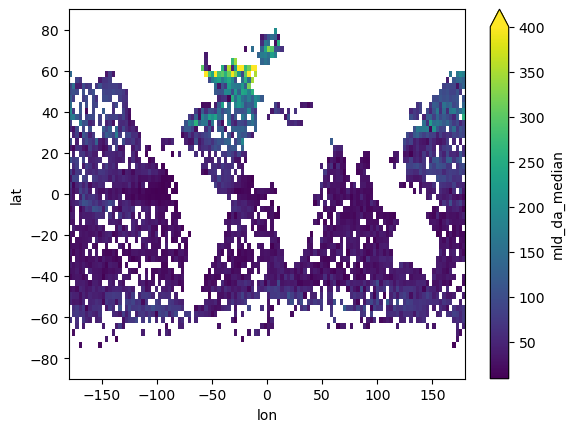

In [10]:
ds_out.mld_da_median.sel(iMONTH=1).plot(vmax=400)

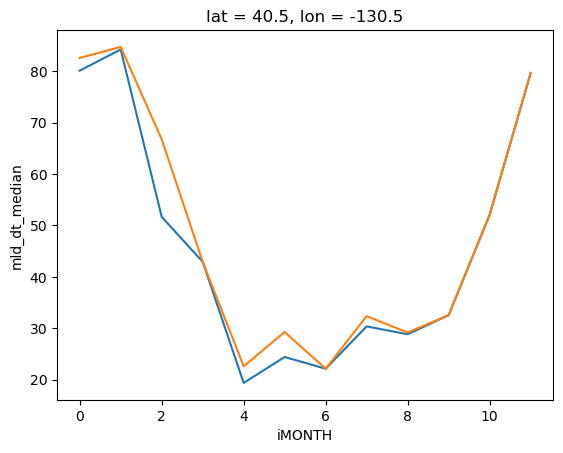

In [11]:
ds_out.mld_da_median.sel(lat=40,method='nearest').sel(lon=-130,method='nearest').plot()
ds_out.mld_dt_median.sel(lat=40,method='nearest').sel(lon=-130,method='nearest').plot()

/Users/takamitsu3/opt/anaconda3/envs/easX305/lib/python3.8/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


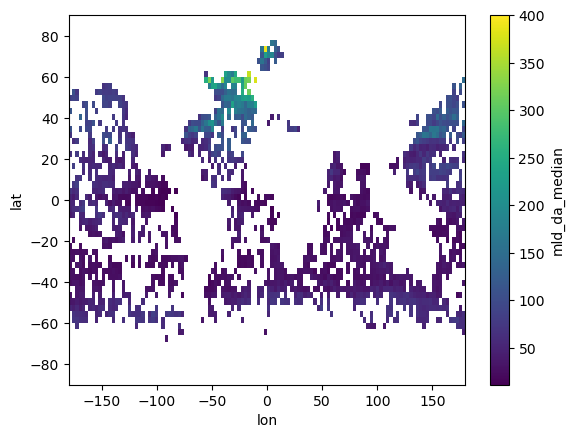

In [12]:
# try different interpolation method
regridder = xe.Regridder(ds, ds_out, "conservative", periodic=True)
regridder
ds_out=regridder(ds)
ds_out.mld_da_median.sel(iMONTH=1).plot(vmax=400)

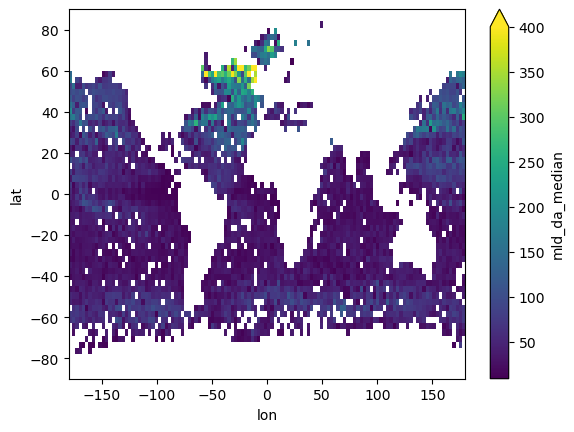

In [13]:
# try different interpolation method
regridder = xe.Regridder(ds, ds_out, "nearest_s2d", periodic=True)
regridder
ds_out=regridder(ds)
ds_out.mld_da_median.sel(iMONTH=1).plot(vmax=400)

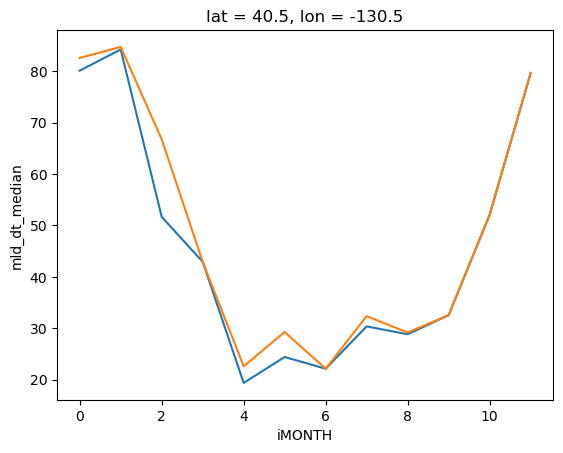

In [14]:
ds_out.mld_da_median.sel(lat=40,method='nearest').sel(lon=-130,method='nearest').plot()
ds_out.mld_dt_median.sel(lat=40,method='nearest').sel(lon=-130,method='nearest').plot()

In [15]:
# writing a netCDF file 
ds_out.to_netcdf('MLD_Argo_3x3_climatology.nc')